In [30]:
import pandas as pd
from wordcloud import WordCloud

import mipkit
from tqdm import tqdm

import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
text_cleaner = mipkit.nlp.TextCleaner(fix_unicode=True,
                                      to_ascii=False,
                                      lower=True,
                                      normalize_whitespace=True,
                                      no_line_breaks=True,
                                      strip_lines=False,
                                      keep_two_line_breaks=False,
                                      no_urls=False,
                                      no_emails=True,
                                      no_phone_numbers=True,
                                      no_numbers=False,
                                      no_digits=False,
                                      no_currency_symbols=True,
                                      no_punct=False,
                                      no_emoji=False,
                                      no_contractions=True,
                                      no_website_links=True,
                                      no_html_tags=True,
                                      no_stopwords=False)


In [43]:
tqdm.pandas()

In [44]:
train_df = pd.read_csv('dataset/train.tsv', sep='\t')
train_df.head()

,PID,Text_data,Label
0,train_pid_1,Waiting for my mind to have a breakdown once t...,moderate
1,train_pid_2,My new years resolution : I'm gonna get my ass...,moderate
2,train_pid_3,New year : Somone else Feeling like 2020 will ...,moderate
3,train_pid_4,"My story I guess : Hi, Im from Germany and my ...",moderate
4,train_pid_5,Sat in the dark and cried myself going into th...,moderate


In [45]:
train_df['Text_data_New'] = train_df.Text_data.progress_apply(text_cleaner)

100%|██████████| 8891/8891 [00:05<00:00, 1619.41it/s]


In [46]:
train_df.Text_data.iloc[8888]

'I don’t think college is right for me : TW: suicide mention\nWhen I (18F) graduated high school, I had no idea where I wanted to go. I skipped the fall semester and found an online college to join for the spring. The semester is wrapping up and I’m miserable. I only took three classes but it still feels overwhelming. I’m not doing well in any of them, but I can’t bring myself to tell anyone. \nI started going to therapy only to stop after three weeks because it wasn’t helping. I take antidepressants but they also don’t seem to be helping. I write in a diary every night, so I have a place to write down my feelings, but even that doesn’t help me anymore.\nI haven’t been sleeping well at all since classes started in January. The other night while I was lying there, I was seriously debating suicide. The only thing that stopped me was worrying about how it would affect my sisters (9 + 15 years old). I feel so hopeless and confused right now, but getting this out feels really nice. \nAny ad

In [47]:
train_df['Text_data_New'].iloc[8888]

'i do not think college is right for me : tw: suicide mention when i (18f) graduated high school, i had no idea where i wanted to go. i skipped the fall semester and found an online college to join for the spring. the semester is wrapping up and i am miserable. i only took three classes but it still feels overwhelming. i am not doing well in any of them, but i can not bring myself to tell anyone. i started going to therapy only to stop after three weeks because it was not helping. i take antidepressants but they also do not seem to be helping. i write in a diary every night, so i have a place to write down my feelings, but even that does not help me anymore. i have not been sleeping well at all since classes started in january. the other night while i was lying there, i was seriously debating suicide. the only thing that stopped me was worrying about how it would affect my sisters (9 + 15 years old). i feel so hopeless and confused right now, but getting this out feels really nice. any

In [48]:
train_group_df = train_df.groupby(by='Label').agg({
    'Text_data_New': list
}).reset_index(drop=False)
train_group_df.head()

,Label,Text_data_New
0,moderate,[waiting for my mind to have a breakdown once ...
1,not depression,[hows everyone doing on this new years eve? : ...
2,severe,[at this point just genuinely curious what sor...


(-0.5, 399.5, 199.5, -0.5)

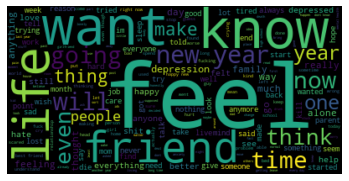

In [49]:
# Moderate Text
text = ' '.join(train_group_df.Text_data_New.iloc[0])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

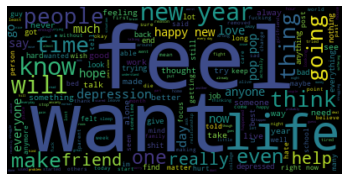

In [50]:
# Not depression Text
text = ' '.join(train_group_df.Text_data_New.iloc[1])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

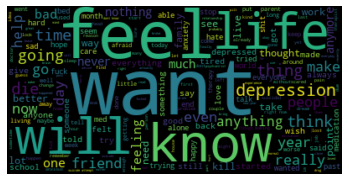

In [51]:
# Severe Text
text = ' '.join(train_group_df.Text_data_New.iloc[2])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [52]:
# Detect emojis

import emoji


def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])


In [53]:
# Emoji from Moderate Text
text = ' '.join(train_group_df.Text_data_New.iloc[0])
extract_emojis(text)

'❤❤❤❤❤❤🦑😭😭🥺😭😭😭😭😭😭❤😎❤🦑😭😭🥺😭😭😭😭😭😭❤😎🙃❤🦑😭😭🥺😭😭😭😭😭😭❤😎🙃❤🦑😭😭🥺😭😭😭😭😭😭❤😎🙃🥰❤🦑😭😭🥺😭😭😭😭😭😭❤😎🙃😅❤🦑😭😭🥺😭😭😭😭😭😭❤😎🙃🥰😅❤🦑😭😭🥺😭😭😭😭😭😭❤😎🙃🥰😅🙊❤🥳🎉❤🦑😭😭🥺😭😭😭😭😭😭❤😎🙃🥰😅😊❤🦑😭😭🥺😭😭😭😭😭😭❤😎🙃😭💖❤😭😔🖤😥😕😐😔👏👏👏👏™😐😘✌💗💗😅🤷🏽♂🥜'

In [54]:
# Emoji from Not Depression Text
text = ' '.join(train_group_df.Text_data_New.iloc[1])
extract_emojis(text)

'❤🌲❤🌲❤🌲❤❤🌲❤❤🌲❤❤❤🌲❤❤❤🌲❤❤✨🙏✌❤🌲❤❤✨🙏✌😪💜💙❤🌲❤❤✨🙏✌😪💜💙❤🌲❤❤✨🙏✌😪💜💙🥰❤🌲❤❤✨🙏✌😪💜💙❤❤🌲❤❤✨🙏✌😪💜💙❤❤🌲😊❤❤✨🙏✌😪💜💙❤❤💜☮😔🥴❤❤🌲❤❤✨🙏✌😪💜💙😊❤🙁😎💪🤔😔👋❤😖😀😂😁🌞'

In [55]:
# Emoji from Severe Text
text = ' '.join(train_group_df.Text_data_New.iloc[2])
extract_emojis(text)

'✌🏼✌🏼✌🏼✌🏼✌🏼✌🏼🥴❤🤍🥂😅🙃❤❤😔🌼🌼💜💙🤬😞🏳🌈❤😕'